In [5]:

import matplotlib.pyplot as plt
import numpy as np
import cmath

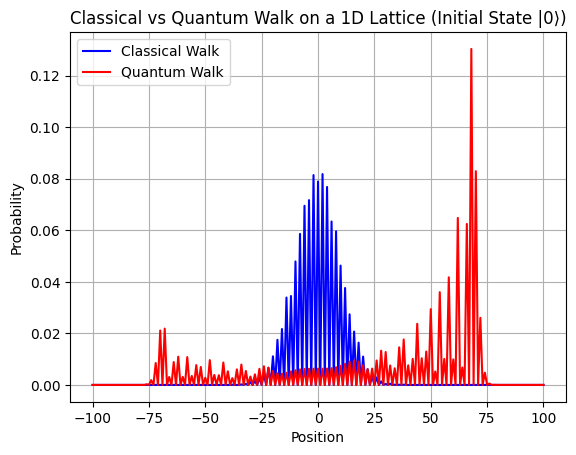

In [6]:
def classical_random_walk(steps, num_walkers):


    """
    Function to simulate a classical random walk on a line

    Parameters:
    steps(int): The number of steps to take in the walk.
    num_walkers (int): The number of walkers to simulate for averagig the distribution.

    Returns:
    numpy.ndarray: The probability distribution of the position at each step for each position.
    """   

    position_counts = np.zeros(2 * steps + 1)
    for _ in range(num_walkers):
        position = steps  # Start at position 0 (centered at index `steps`)
        for _ in range(steps):
            position += np.random.choice([-1, 1])
        position_counts[position] += 1
    return position_counts / num_walkers  # Normalize to get probabilities



def quantum_walk(steps):
    """
    Function to simulate a Quantum walk on a line

    Parameters:
    steps(int): The number of steps to take in the walk.
    Returns:
    numpy.ndarray: The probability distribution of the position at each step for each position.
    """   
    # Initializing position and coin states
    position_states = np.zeros((2 * steps + 1, 2), dtype=complex)
    # Starting at position 0 with coin state |0⟩
    position_states[steps, 1] = 1

    # Hadamard coin operator
    hadamard = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    
    for _ in range(steps):
        new_states = np.zeros_like(position_states)
        for i in range(1, len(position_states) - 1):
            new_states[i-1, 0] += hadamard[0, 0] * position_states[i, 0] + hadamard[0, 1] * position_states[i, 1]
            new_states[i+1, 1] += hadamard[1, 0] * position_states[i, 0] + hadamard[1, 1] * position_states[i, 1]
        position_states = new_states
    
    return np.sum(np.abs(position_states)**2, axis=1)

# Parameters
steps = 100
num_walkers = 10000

# Performing walks
classical_dist = classical_random_walk(steps, num_walkers)
quantum_dist = quantum_walk(steps)

# Plot the results
positions = np.arange(-steps, steps + 1)
plt.plot(positions, classical_dist, label='Classical Walk', color='blue')
plt.plot(positions, quantum_dist, label='Quantum Walk', color='red')
plt.title('Classical vs Quantum Walk on a 1D Lattice (Initial State |0⟩)')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()




